# Simple example of convolution in tf

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import util
import matplotlib.cm as cm
%matplotlib inline

def plot_matrix(ma):
    plt.pcolormesh(ma[::-1], cmap=cm.gray, antialiased=True)

train_dataset, train_labels, valid_dataset, valid_labels, test_dataset, test_labels = util.get_data_4d()


example = np.array([train_dataset[3]])
example.shape

(1, 28, 28, 1)

### Plotting the original image

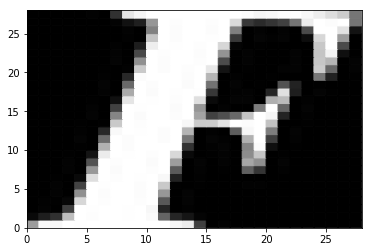

In [2]:
image = example.reshape((28, 28))
plot_matrix(image)

### Applying one convolution with some random filter 

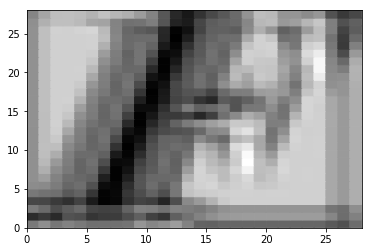

In [3]:
graph = tf.Graph()
with graph.as_default():
    tf_example = tf.constant(example,dtype="float32")
    shape = [6,6,1,1]
    Winit = tf.truncated_normal(shape, stddev=0.1)
    kernel = tf.get_variable("kernel",
                             dtype=tf.float32,
                             initializer=Winit)
    conv = tf.nn.conv2d(input=tf_example,
                              filter=kernel,
                              strides=[1, 1, 1, 1],
                              padding='SAME')
    

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    result = session.run(conv)
    size = result.shape[1]
    new_image = session.run(conv).reshape((size, size))
    
plot_matrix(new_image)

### Applying max pooling in the above image

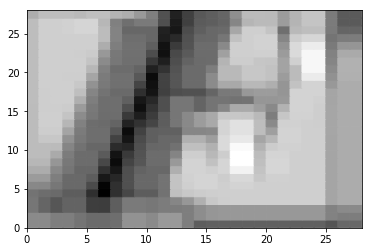

In [4]:
graph = tf.Graph()
with graph.as_default():
    new_example = tf.constant(result,dtype="float32")
    pool = tf.nn.max_pool(value=result,
                          ksize=[1, 2, 2, 1],
                          strides=[1,1, 1, 1],
                          padding='SAME')    

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    new_result = session.run(pool)
    size = new_result.shape[1]
    new_image = session.run(pool).reshape((size, size))
    
plot_matrix(new_image)

### Applying average pooling in the image in [3]

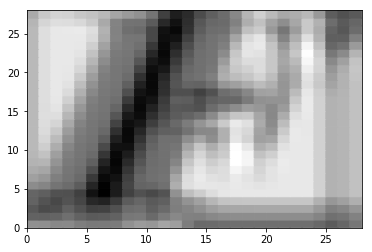

In [5]:
graph = tf.Graph()
with graph.as_default():
    new_example = tf.constant(result,dtype="float32")
    pool = tf.nn.avg_pool(value=result,
                          ksize=[1, 2, 2, 1],
                          strides=[1,1,1, 1],
                          padding='SAME')    

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    new_result = session.run(pool)
    size = new_result.shape[1]
    new_image = session.run(pool).reshape((size, size))
    
plot_matrix(new_image)